In [ ]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
import seaborn as sns

In [ ]:
# Load the dataset

dummy = pd.read_csv('dummy.csv')
dummy = dummy.drop(columns = ['Unnamed: 0'])

dummy.head()

,Bhasan Char,Illegal Activity,People Leaving,Myanmar Rights Views,Mental Health,Trust,Access to Help,Personal Support,Violence,Camp Condition,...,Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?,Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?,How often do you talk with Rohingya people outside Bangladesh and Myanmar?,How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?,How afraid are you to leave your child unattended in the camp after it gets dark?,Do you think that there are Rohingya families whose child has gone missing since they moved to Bangladesh?,Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?,To what extent do you feel at home in the camp in Bangladesh now?,Where do you think you will be in six months from now?,How do you feel about the future?
0,0,2,0,0,4,1,0,0,1,2,...,0,0,0,0,0,0,1,1,7,4
1,3,2,2,0,4,5,0,0,1,0,...,0,0,3,0,0,2,2,1,3,4
2,0,2,1,1,3,0,0,0,1,2,...,0,0,3,0,3,2,0,1,1,4
3,0,1,5,0,4,3,0,1,0,2,...,0,0,0,0,0,2,0,1,3,3
4,0,1,2,1,2,5,0,0,2,2,...,0,0,0,0,2,2,0,1,9,4


In [ ]:
# Find the correlation between columns and how you feel about the future (Use Matthew's Correlation Coefficient)
from sklearn.metrics import matthews_corrcoef # For How do you feel about the future?

dummy_copy = dummy.copy() # Copy used for coefficient analysis only
# dummy_copy.drop(columns = ['How many betel nuts a day on average?', 'How many cigarettes a day on average?'])

# Analysis for the Matthew's Correlation Coefficient
coefficient = {"Questions": dummy_copy.columns}

# Get the correlation coefficients
for item in dummy_copy.columns:
  curr = dummy_copy[item] # Get the column
  curr = curr.to_numpy()
  coef_list = []

  for q in dummy_copy.columns:
    Y = dummy_copy[q].to_numpy()

    coef = matthews_corrcoef(curr, Y)
    coef_list.append(coef)

  coefficient[item] = coef_list

coefficient = pd.DataFrame(coefficient)

pd.set_option('display.max_rows', None)
coefficient.head(100)

,Questions,Bhasan Char,Illegal Activity,People Leaving,Myanmar Rights Views,Mental Health,Trust,Access to Help,Personal Support,Violence,...,Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?,Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?,How often do you talk with Rohingya people outside Bangladesh and Myanmar?,How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?,How afraid are you to leave your child unattended in the camp after it gets dark?,Do you think that there are Rohingya families whose child has gone missing since they moved to Bangladesh?,Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?,To what extent do you feel at home in the camp in Bangladesh now?,Where do you think you will be in six months from now?,How do you feel about the future?
0,Bhasan Char,1.000000,0.113618,0.010490,-0.020695,-0.029834,-0.015812,-0.042969,-0.021230,0.009032,...,0.015516,0.061618,-0.041980,-0.009724,0.148203,-0.087578,0.062958,-0.073427,-0.025606,0.031365
1,Illegal Activity,0.113618,1.000000,0.039194,-0.063248,0.012829,-0.051846,0.001595,-0.075277,-0.094778,...,0.154526,0.070994,0.037809,-0.002585,0.071107,-0.050363,-0.019399,-0.065997,0.012216,0.077229
2,People Leaving,0.010490,0.039194,1.000000,-0.017772,0.049450,-0.034784,0.059652,-0.090134,-0.078468,...,0.016401,-0.001078,0.016126,-0.004024,-0.021342,-0.054278,0.002494,0.130553,0.026175,-0.105627
3,Myanmar Rights Views,-0.020695,-0.063248,-0.017772,1.000000,0.000734,-0.072003,-0.012592,0.342238,-0.274760,...,-0.054578,-0.033493,0.050120,0.023294,-0.100012,-0.031495,-0.013847,0.196455,-0.005572,-0.038637
4,Mental Health,-0.029834,0.012829,0.049450,0.000734,1.000000,-0.011726,0.048133,-0.003941,-0.056425,...,0.004459,-0.032340,0.105710,-0.000750,-0.029626,0.013740,0.010206,0.028856,0.051811,-0.032848
5,Trust,-0.015812,-0.051846,-0.034784,-0.072003,-0.011726,1.000000,0.036391,-0.013131,0.147105,...,-0.022597,-0.008862,0.005083,0.008227,0.017681,0.004750,0.085746,-0.028149,-0.005398,-0.037287
6,Access to Help,-0.042969,0.001595,0.059652,-0.012592,0.048133,0.036391,1.000000,-0.057552,0.112426,...,-0.041174,-0.024831,0.131648,0.002435,-0.013457,0.030033,-0.028075,0.182250,0.050387,-0.158643
7,Personal Support,-0.021230,-0.075277,-0.090134,0.342238,-0.003941,-0.013131,-0.057552,1.000000,-0.157979,...,-0.034033,-0.004308,-0.051776,0.030947,-0.042640,0.011649,-0.032275,-0.003564,-0.005101,-0.118685
8,Violence,0.009032,-0.094778,-0.078468,-0.274760,-0.056425,0.147105,0.112426,-0.157979,1.000000,...,-0.011002,-0.005264,-0.067748,-0.030034,0.056706,0.071869,-0.019577,-0.058160,-0.025778,-0.045162
9,Camp Condition,-0.056695,0.068228,0.078879,0.047740,0.120513,-0.021981,0.320481,-0.084891,0.056437,...,0.064909,0.050987,0.160997,-0.028463,0.015130,0.133266,-0.134689,0.296748,0.055782,-0.131278


In [ ]:
# Correlation matrix is too large

def view_correlation(coef, index: int) -> int:
  """Take in an index and then return the sorted numbers."""

  df = coef.iloc[:, [0, index]]
  column = coef.columns[index]
  df = df.sort_values(column, ascending = False)

  return df

def obtain_features(coef, cut_off = 0.15) -> list:
  """Obtain the features after viewing correlation in list format.
  """

  features = []

  for item in coef.to_dict('records'):
    correlation = item[coef.columns[-1]]
    curr_index = coef.columns[0]
    question = item[curr_index]

    if np.abs(correlation) >= cut_off:
      features.append(question)

  return features

def create_features(curr: list, features: list) -> list:
  """Take in a current and features list and then append items from features to current, and then return them."""

  for item in features:
    if not (item in curr):
      curr.append(item)

  return curr

# View the correlation: How do you feel about the future?

curr = view_correlation(coefficient, 35)
future_features = obtain_features(curr)

# View the correlation: To what extent do you feel at home in the camp in Bangladesh now?

curr = view_correlation(coefficient, 33)
home_features = obtain_features(curr)

# View the correlation: Do you often feel stressed or overwhelmed by your situation?

#curr = view_correlation(coefficient, 31)
#stress_features = obtain_features(curr)

# Final list of features

features = create_features(future_features, home_features)
#features = create_features(features, stress_features)

# Final Dummy List
dummy['confidence_index'] = dummy['How do you feel about the future?'] + dummy['To what extent do you feel at home in the camp in Bangladesh now?']
dummy = dummy.drop(columns= ['How do you feel about the future?', 'To what extent do you feel at home in the camp in Bangladesh now?'])



In [ ]:
# List the features
dummy = dummy.filter(items = ['confidence_index', *features])
dummy_feat = dummy.columns
print(f'Number of features: {len(dummy_feat)}')

for item in dummy_feat:
  print(item)

Number of features: 8
confidence_index
How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?
How satisfied are you with the income your family makes in the camp?
Access to Help
Where do you think you will be in six months from now?
Camp Condition
Sex
Myanmar Rights Views


<Axes: >

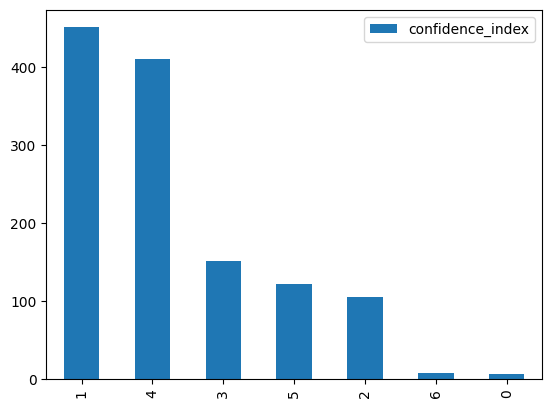

In [ ]:
# Visualize the distribution of the confidence index

counts = pd.DataFrame(dummy['confidence_index'].value_counts())
counts.plot.bar()

In [ ]:
from matplotlib.font_manager import X11FontDirectories
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Y = dummy['confidence_index']
X = dummy.drop(['confidence_index'], axis = 1)


# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, random_state = 0)

Current Number of Depth: 1
Current Number of Depth: 2
Current Number of Depth: 3
Current Number of Depth: 4
Current Number of Depth: 5
Current Number of Depth: 6
Current Number of Depth: 7
Current Number of Depth: 8
Current Number of Depth: 9
Current Number of Depth: 10
Current Number of Depth: 11
Current Number of Depth: 12
Current Number of Depth: 13
Current Number of Depth: 14


<Axes: xlabel='Depth', ylabel='Accuracy'>

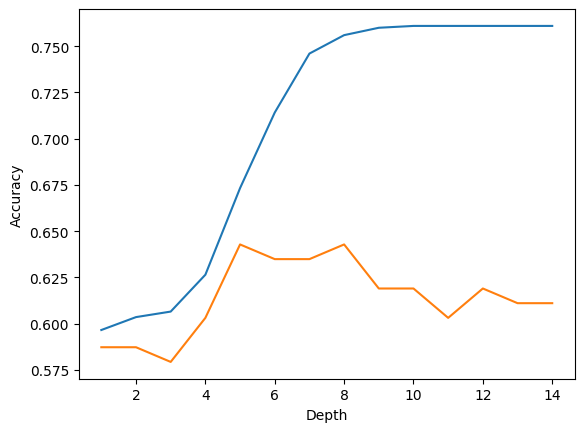

In [ ]:
# Implementation of the Random Forest Classification

acc = []
estimators = []
validation = []

for n_depth in range(1, 15):

  print(f"Current Number of Depth: {n_depth}")
  RandomForest = RandomForestClassifier(n_estimators = 180,
                                        criterion = 'entropy', max_depth = n_depth, random_state = 0)
  fit = RandomForest.fit(X_train, Y_train)
  Y_fit = fit.predict(X_train)
  curr_cost = accuracy_score(Y_fit, Y_train)
  Y_validation_fit = fit.predict(X_val)
  val_acc = accuracy_score(Y_validation_fit, Y_val)

  acc.append(curr_cost)
  estimators.append(n_depth)
  validation.append(val_acc)

# Visualization: Seems like the best depth is at 5

results = pd.DataFrame({'Accuracy': acc, 'Depth': estimators, 'Validation Accuracy': validation})
sns.lineplot(results, x = 'Depth', y = 'Accuracy', )
sns.lineplot(results, x = 'Depth', y = 'Validation Accuracy')

Current Number of Estimators: 170
Current Number of Estimators: 171
Current Number of Estimators: 172
Current Number of Estimators: 173
Current Number of Estimators: 174
Current Number of Estimators: 175
Current Number of Estimators: 176
Current Number of Estimators: 177
Current Number of Estimators: 178
Current Number of Estimators: 179
Current Number of Estimators: 180
Current Number of Estimators: 181
Current Number of Estimators: 182
Current Number of Estimators: 183
Current Number of Estimators: 184
Current Number of Estimators: 185
Current Number of Estimators: 186
Current Number of Estimators: 187
Current Number of Estimators: 188
Current Number of Estimators: 189
Current Number of Estimators: 190
Current Number of Estimators: 191
Current Number of Estimators: 192
Current Number of Estimators: 193
Current Number of Estimators: 194
Current Number of Estimators: 195
Current Number of Estimators: 196
Current Number of Estimators: 197
Current Number of Estimators: 198
Current Number

<Axes: xlabel='Estimators', ylabel='Accuracy'>

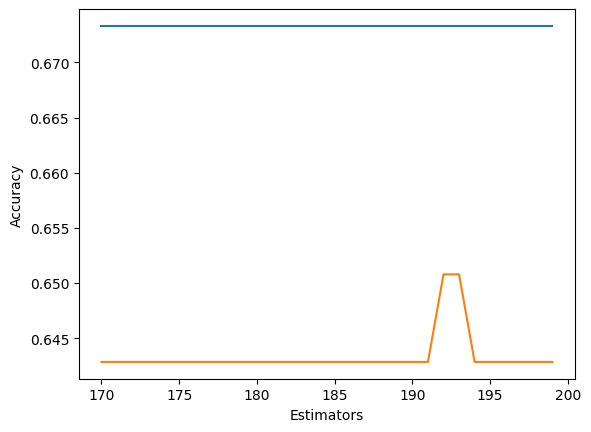

In [ ]:
acc = []
estimators = []
validation = []

for estimator in range(170, 200):

  print(f"Current Number of Estimators: {estimator}")
  RandomForest = RandomForestClassifier(n_estimators = estimator, criterion = 'entropy', max_depth = 5,
                                        random_state = 0)
  fit = RandomForest.fit(X_train, Y_train)
  Y_fit = fit.predict(X_train)
  curr_cost = accuracy_score(Y_fit, Y_train)
  Y_validation_fit = fit.predict(X_val)
  val_acc = accuracy_score(Y_validation_fit, Y_val)

  acc.append(curr_cost)
  estimators.append(estimator)
  validation.append(val_acc)

# Visualization: Seems like the best depth is at 4

#print(len(cost), len(estimators), len(validation))

results = pd.DataFrame({'Accuracy': acc, 'Estimators': estimators, 'Validation Accuracy': validation})
sns.lineplot(results, x = 'Estimators', y = 'Accuracy', )
sns.lineplot(results, x = 'Estimators', y = 'Validation Accuracy')

In [ ]:
# 192 estimators seems to be good

RandomForest = RandomForestClassifier(n_estimators = 192, criterion = 'gini', max_depth = 5,
                                        random_state = 0)
fit = RandomForest.fit(X_train, Y_train)
Y_fit = fit.predict(X_train)
curr_cost = accuracy_score(Y_fit, Y_train)
Y_validation_fit = fit.predict(X_val)
val_acc = accuracy_score(Y_validation_fit, Y_val)
Y_test_fit = fit.predict(X_test)
test_acc = accuracy_score(Y_test_fit, Y_test)

print(f"Training Accuracy: {curr_cost}")
print(f"Validation Accuracy: {val_acc}")
print(f"Testing Accuracy: {test_acc}")

Training Accuracy: 0.6782868525896414
Validation Accuracy: 0.626984126984127
Testing Accuracy: 0.6984126984126984


In [ ]:
# Visualize Tree
from sklearn.metrics import confusion_matrix, classification_report

report = pd.DataFrame(classification_report(Y_test, Y_test_fit, output_dict = True))
report.head(100)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.728571,0.333333,0.0,0.714286,0.600000,0.0,0.698413,0.396032,0.599169
recall,0.980769,0.125000,0.0,0.789474,0.461538,0.0,0.698413,0.392797,0.698413
f1-score,0.836066,0.181818,0.0,0.750000,0.521739,0.0,0.698413,0.381604,0.636608
support,52.000000,8.000000,14.0,38.000000,13.000000,1.0,0.698413,126.000000,126.000000


[Text(0.4625, 0.9166666666666666, 'x[0] <= 3.5\ngini = 0.729\nsamples = 638\nvalue = [6, 371, 90, 102, 326, 104, 5]'),
 Text(0.21, 0.75, 'x[3] <= 4.0\ngini = 0.333\nsamples = 180\nvalue = [1, 12, 3, 30, 236, 9, 1]'),
 Text(0.11, 0.5833333333333334, 'x[6] <= 1.5\ngini = 0.301\nsamples = 172\nvalue = [1, 10, 3, 25, 234, 8, 1]'),
 Text(0.06, 0.4166666666666667, 'x[6] <= 0.5\ngini = 0.657\nsamples = 11\nvalue = [0, 10, 0, 1, 7, 4, 0]'),
 Text(0.04, 0.25, 'x[0] <= 2.0\ngini = 0.615\nsamples = 10\nvalue = [0, 10, 0, 1, 7, 2, 0]'),
 Text(0.02, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 4, 0, 0, 0, 0, 0]'),
 Text(0.06, 0.08333333333333333, 'gini = 0.648\nsamples = 9\nvalue = [0, 6, 0, 1, 7, 2, 0]'),
 Text(0.08, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 2, 0]'),
 Text(0.16, 0.4166666666666667, 'x[5] <= 0.5\ngini = 0.229\nsamples = 161\nvalue = [1, 0, 3, 24, 227, 4, 1]'),
 Text(0.12, 0.25, 'x[1] <= 0.5\ngini = 0.276\nsamples = 86\nvalue = [1, 0, 0, 16, 118, 4, 1]'),

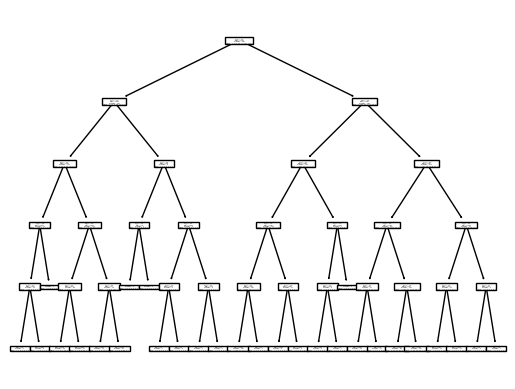

In [ ]:
from sklearn import tree

tree.plot_tree(RandomForest.estimators_[0])